<a href="https://colab.research.google.com/github/medhajoshi2503/Python/blob/main/endsem_group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import random

# Define lists of possible values for each parameter
age_values = [30, 45, 22, 55, 40, 60, 35, 28, 50, 65]
sex_values = ['M', 'F']
dosage_values = [50, 75, 100]
dosage_interval_values = [6,8,12,24]
###recovered_values = ['Yes', 'No']
recovered_values = ['0', '1']
drug_name_values = ['A', 'A']
comorbid_values = ['Yes', 'No']
bmi_values = [20,21,22,23,24,25,26,27]

# Create an empty DataFrame to hold the toy dataset
df = pd.DataFrame(columns=['Age', 'Sex', 'Dosage', 'Dosage Interval', 'Recovered ', 'Drug ','Comorbid','BMI'])

# Generate random data for each row in the dataset
for i in range(100):  # Generate 10 rows
    age = random.choice(age_values)
    sex = random.choice(sex_values)
    dosage = random.choice(dosage_values)
    dosage_interval = random.choice(dosage_interval_values)
    recovered = random.choice(recovered_values)
    drug = random.choice(drug_name_values)
    comorbid = random.choice(comorbid_values)
    bmi = random.choice(bmi_values)

    # Append the generated row to the DataFrame
    df = df.append({'Age': age,
                    'Sex': sex,
                    'Dosage': dosage,
                    'Dosage Interval': dosage_interval,
                    'Recovered ': recovered,
                    'Drug ': drug,
                    'Comorbid': comorbid,
                    'BMI': bmi}, ignore_index=True)

# Print the generated dataset
print(df)


   Age Sex Dosage Dosage Interval Recovered  Drug  Comorbid BMI
0   22   F     75              12          1     A       No  23
1   60   M     75               8          1     A      Yes  23
2   28   F     50               8          0     A      Yes  25
3   30   F     50              24          0     A      Yes  27
4   40   M     50              12          1     A      Yes  20
..  ..  ..    ...             ...        ...   ...      ...  ..
95  28   F     50              24          1     A       No  21
96  45   F     50              12          1     A      Yes  25
97  50   M     50              24          1     A      Yes  23
98  28   F     50              24          0     A      Yes  24
99  45   F     75               6          1     A       No  26

[100 rows x 8 columns]


In [17]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              100 non-null    object
 1   Sex              100 non-null    object
 2   Dosage           100 non-null    object
 3   Dosage Interval  100 non-null    object
 4   Recovered        100 non-null    object
 5   Drug             100 non-null    object
 6   Comorbid         100 non-null    object
 7   BMI              100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [16]:
##import seaborn as sns
##import matplotlib.pyplot as plt

##df['non_numerical_column'].value_counts().plot(kind='bar')
##plt.show()

##num_df = df.select_dtypes(include=['float64', 'int64'])
###p = num_df.hist(figsize = (20,20))

KeyError: ignored

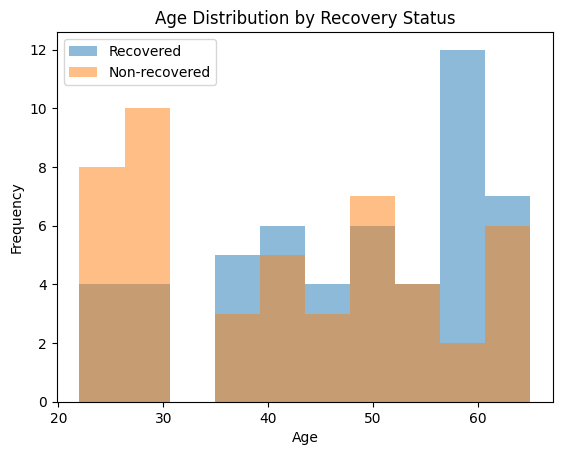

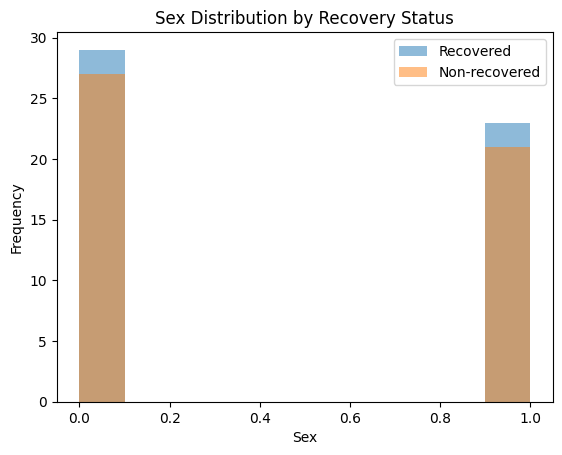

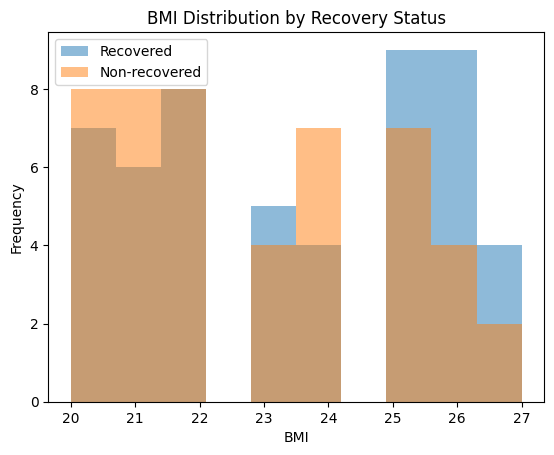

In [20]:
import matplotlib.pyplot as plt

# Plot age distribution for recovered and non-recovered patients
plt.hist(df[df['Recovered '] == '1']['Age'], alpha=0.5, label='Recovered')
plt.hist(df[df['Recovered '] == '0']['Age'], alpha=0.5, label='Non-recovered')
plt.title('Age Distribution by Recovery Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot sex distribution for recovered and non-recovered patients
plt.hist(df[df['Recovered '] == '1']['Sex'], alpha=0.5, label='Recovered')
plt.hist(df[df['Recovered '] == '0']['Sex'], alpha=0.5, label='Non-recovered')
plt.title('Sex Distribution by Recovery Status')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot BMI distribution for recovered and non-recovered patients
plt.hist(df[df['Recovered '] == '1']['BMI'], alpha=0.5, label='Recovered')
plt.hist(df[df['Recovered '] == '0']['BMI'], alpha=0.5, label='Non-recovered')
plt.title('BMI Distribution by Recovery Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define lists of possible values for each parameter
age_values = [30, 45, 22, 55, 40, 60, 35, 28, 50, 65]
sex_values = ['M', 'F']
dosage_values = [50, 75, 100]
dosage_interval_values = [6,8,12,24]
###recovered_values = ['Yes', 'No']
recovered_values = ['0', '1']
drug_name_values = ['A', 'A']
comorbid_values = ['Yes', 'No']
bmi_values = [20,21,22,23,24,25,26,27]

# Create an empty DataFrame to hold the toy dataset
df = pd.DataFrame(columns=['Age', 'Sex', 'Dosage', 'Dosage Interval', 'Recovered ', 'Drug ','Comorbid','BMI'])

# Generate random data for each row in the dataset
for i in range(10000):  # Generate 10 rows
    age = random.choice(age_values)
    sex = random.choice(sex_values)
    dosage = random.choice(dosage_values)
    dosage_interval = random.choice(dosage_interval_values)
    recovered = random.choice(recovered_values)
    drug = random.choice(drug_name_values)
    comorbid = random.choice(comorbid_values)
    bmi = random.choice(bmi_values)

    # Append the generated row to the DataFrame
    df = df.append({'Age': age,
                    'Sex': sex,
                    'Dosage': dosage,
                    'Dosage Interval': dosage_interval,
                    'Recovered ': recovered,
                    'Drug ': drug,
                    'Comorbid': comorbid,
                    'BMI': bmi}, ignore_index=True)

# Encode categorical columns
cat_columns = ['Sex', 'Drug ', 'Comorbid']
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split into training and testing sets
X = df.drop('Recovered ', axis=1)
y = df['Recovered ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate performance on testing set
acc = lr.score(X_test, y_test)
print(f"Accuracy on testing set: {acc}")


Accuracy on testing set: 0.487
